# Reference Link
https://www.kaggle.com/yashvi/vehicle-insurance-eda-and-boosting-models

https://www.kaggle.com/roshankumarg/rank-10-solution-cross-sell-prediction-hackathon

https://www.kaggle.com/isaienkov/insurance-prediction-eda-and-modeling-acc-88

In [104]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import holoviews as hv

# Testing
import scipy
import scipy.stats as st

# hv.extension('bokeh')

%matplotlib inline

In [2]:
print('Numpy Version : ' + np.__version__)
print('Pandas Version : ' + pd.__version__)
print('Matplotlib Version : ' + matplotlib.__version__)
print('Seaborn Version : ' + sns.__version__)
print('Scipy Version : ' + scipy.__version__)

Numpy Version : 1.18.5
Pandas Version : 1.0.5
Matplotlib Version : 3.2.2
Seaborn Version : 0.10.1
Scipy Version : 1.5.0


<h1>DATA DESCRIPTION
    

In [114]:
from IPython.display import Image

Image(url= "archive/data-description.png", width=1000)

In [68]:
train = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')
train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

Target Output : Feature <strong>RESPONSE</strong>

In [64]:
train.shape

(381109, 12)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [67]:
train.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [5]:
# Finding Missing Value
data_missing_value = train.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value = data_missing_value[data_missing_value['missing_value'] > 0]
data_missing_value['percentage'] = round((data_missing_value['missing_value'] / len(train)) * 100, 2)

data_missing_value

Empty DataFrame
Columns: [feature, missing_value, percentage]
Index: []

In [6]:
# Finding Duplicates
train.duplicated().sum()

0

In [7]:
#Invalid Value
display(train.select_dtypes(include=['object']).columns)
print(train.select_dtypes(include=object).shape)
data_cat = train.select_dtypes(include=['object'])

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

(381109, 3)


In [8]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [9]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [10]:
train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [11]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(train.select_dtypes(include=numerics).columns)
print(train.select_dtypes(include=numerics).shape)
data_num = train.select_dtypes(include=numerics)

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

(381109, 9)


In [69]:
train[['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']].describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [70]:
train[['Gender', 'Vehicle_Age', 'Vehicle_Damage']].describe()

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

In [13]:
trainGroup = train.loc[:, train.columns.intersection(['Response'])]
trainGroup['Age-Group'] = train['Age'].apply(lambda x : '> 50' if x > 50 else ('36 - 50' if (x > 35) and (x < 51) else '20-35'))
trainGroup['Vintage-Group'] = train['Vintage'].apply(lambda x : '0-100' if x < 100 else ('100 - 200' if (x > 100) and (x < 200) else '200 - 300'))
trainGroup['Annual_Premium-Group'] = train['Annual_Premium'].apply(lambda x : '> 450K' if x > 450000 else ('150K - 450K' if (x > 150000) and (x < 450001) else '0 - 150K'))

trainGroup

Response Age-Group Vintage-Group Annual_Premium-Group
0              1   36 - 50     200 - 300             0 - 150K
1              0      > 50     100 - 200             0 - 150K
2              1   36 - 50         0-100             0 - 150K
3              0     20-35     200 - 300             0 - 150K
4              0     20-35         0-100             0 - 150K
...          ...       ...           ...                  ...
381104         0      > 50         0-100             0 - 150K
381105         0     20-35     100 - 200             0 - 150K
381106         0     20-35     100 - 200             0 - 150K
381107         0      > 50         0-100             0 - 150K
381108         0   36 - 50     200 - 300             0 - 150K

[381109 rows x 4 columns]

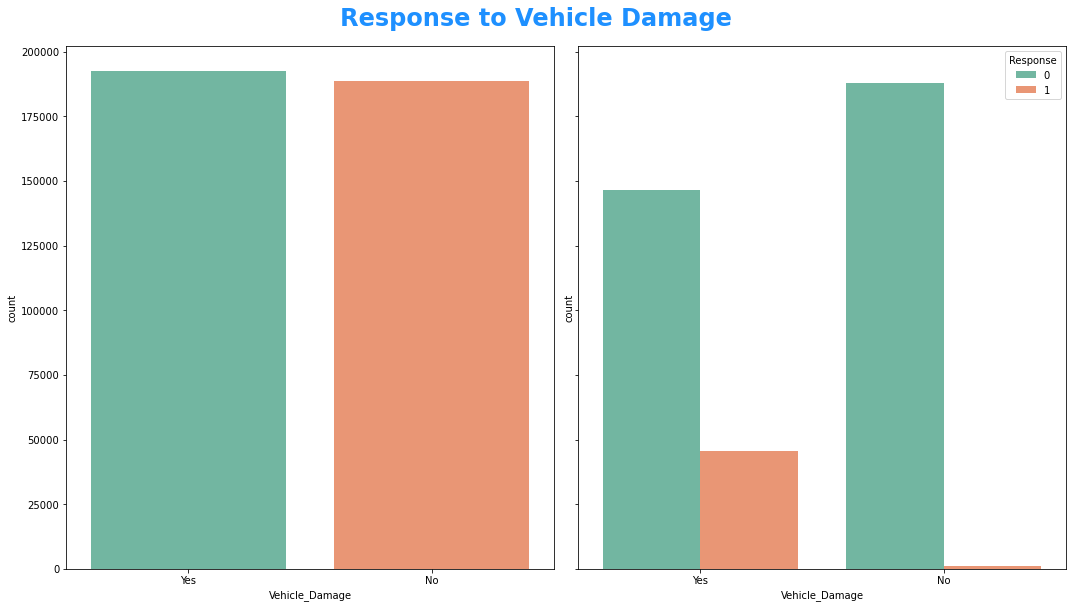

In [14]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

g = sns.countplot(train['Vehicle_Damage'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(train['Vehicle_Damage'], hue = train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])

plt.suptitle('Response to Vehicle Damage',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold')

fig.tight_layout();

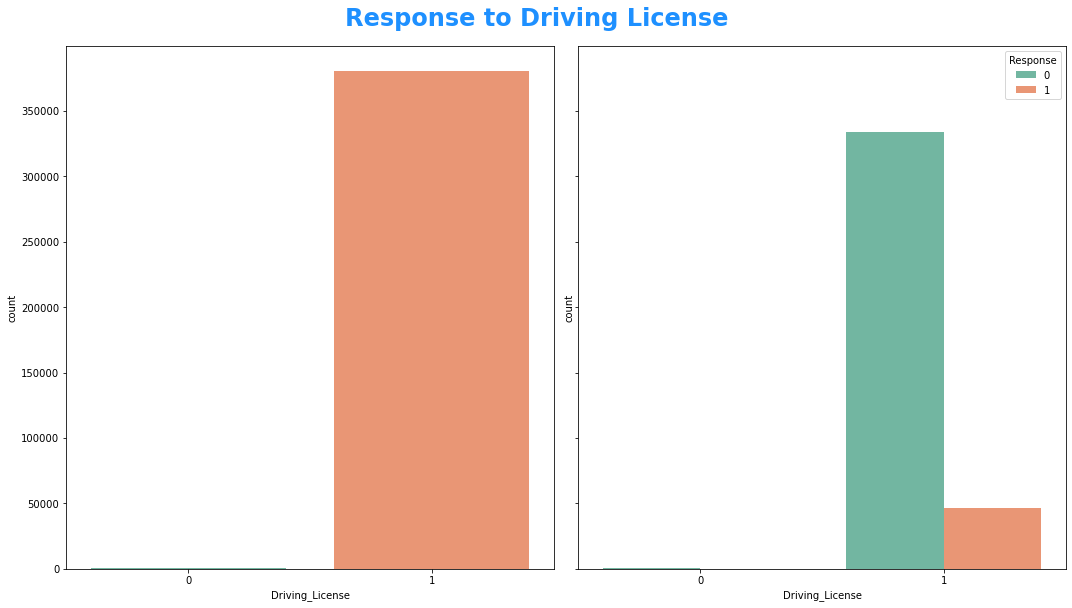

In [15]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

g = sns.countplot(train['Driving_License'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(train['Driving_License'], hue = train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])

plt.suptitle('Response to Driving License',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold')

fig.tight_layout();

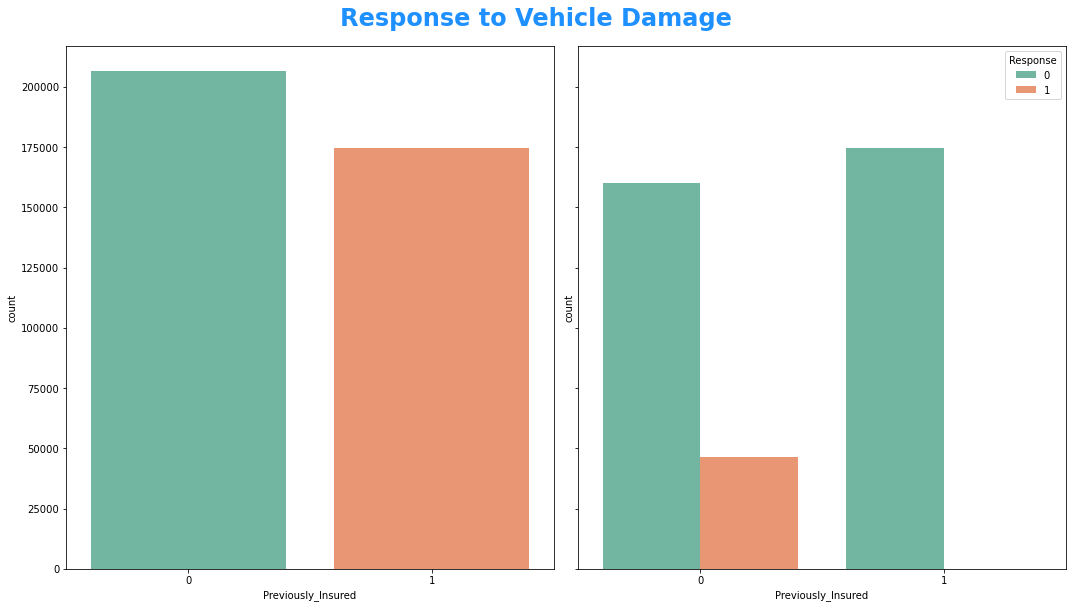

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)
# 
g = sns.countplot(train['Previously_Insured'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(train['Previously_Insured'], hue = train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])

plt.suptitle('Response to Vehicle Damage',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold')

fig.tight_layout();

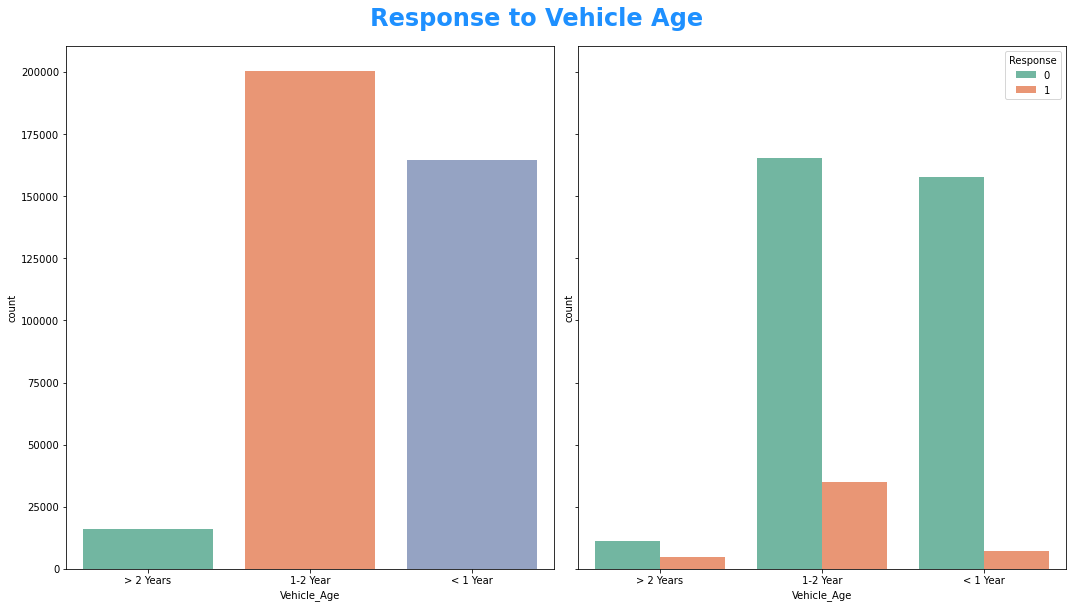

In [17]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

g = sns.countplot(train['Vehicle_Age'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(train['Vehicle_Age'], hue = train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])

plt.suptitle('Response to Vehicle Age',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold');

fig.tight_layout();

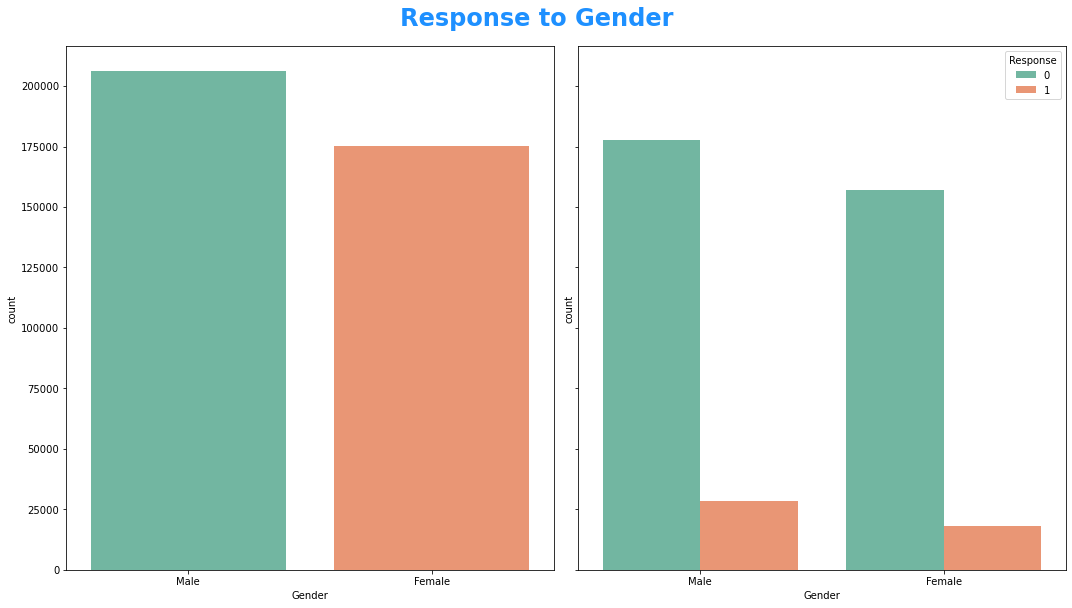

In [50]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

g = sns.countplot(train['Gender'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(train['Gender'], hue = train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])

plt.suptitle('Response to Gender',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold');

fig.tight_layout();

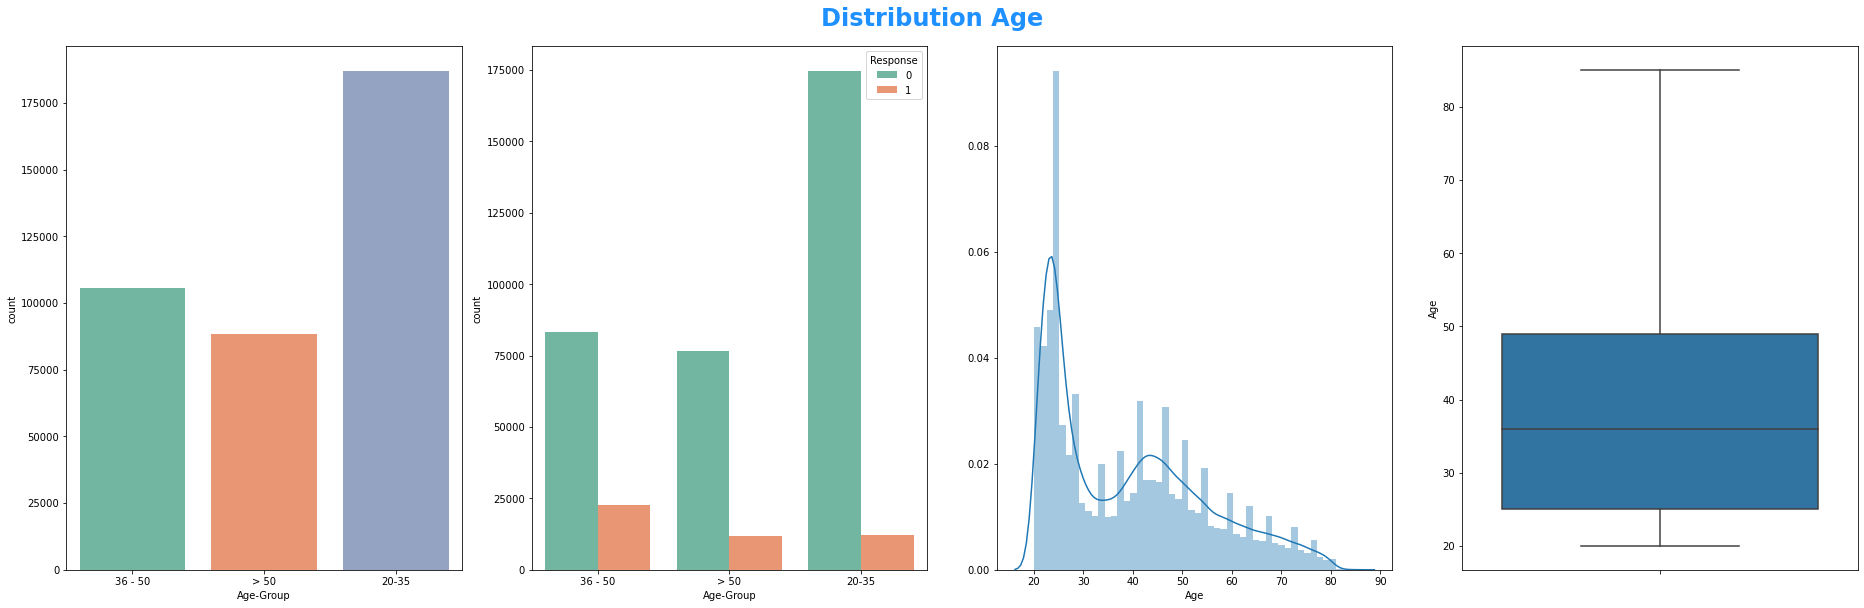

In [103]:
fig,ax = plt.subplots(1,4,figsize=(26,8))

g = sns.countplot(trainGroup['Age-Group'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(trainGroup['Age-Group'], hue = trainGroup['Response'],palette=sns.color_palette("Set2"), ax=ax[1])
g = sns.distplot(train['Age'], ax=ax[2])
g = sns.boxplot(train['Age'], orient='v', ax=ax[3])

plt.suptitle('Distribution Age',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold');

fig.tight_layout();

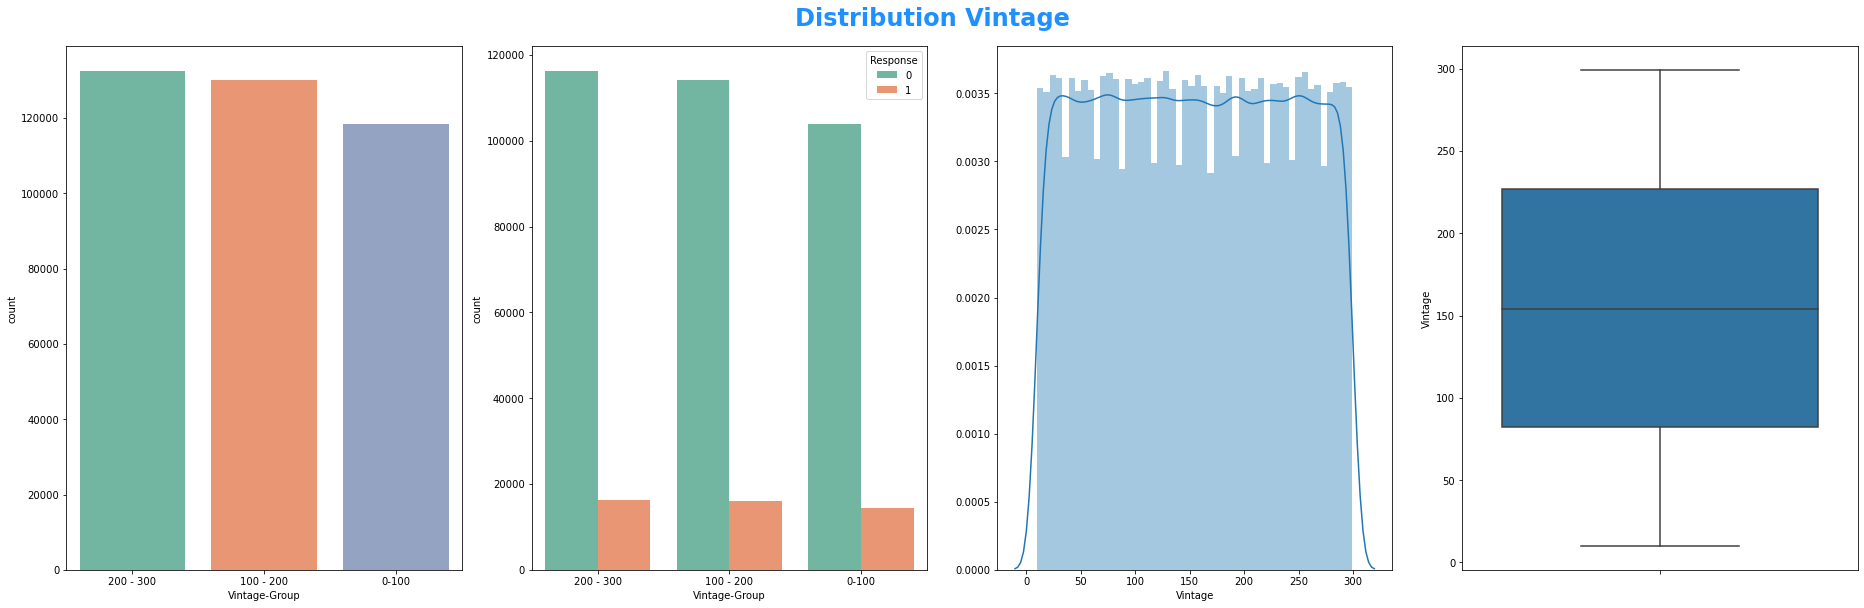

In [76]:
fig,ax = plt.subplots(1,4,figsize=(26,8))

g = sns.countplot(trainGroup['Vintage-Group'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(trainGroup['Vintage-Group'], hue = trainGroup['Response'],palette=sns.color_palette("Set2"), ax=ax[1])
g = sns.distplot(train['Vintage'], ax=ax[2])
g = sns.boxplot(train['Vintage'], orient='v', ax=ax[3])

plt.suptitle('Distribution Vintage',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold');
	
fig.tight_layout();

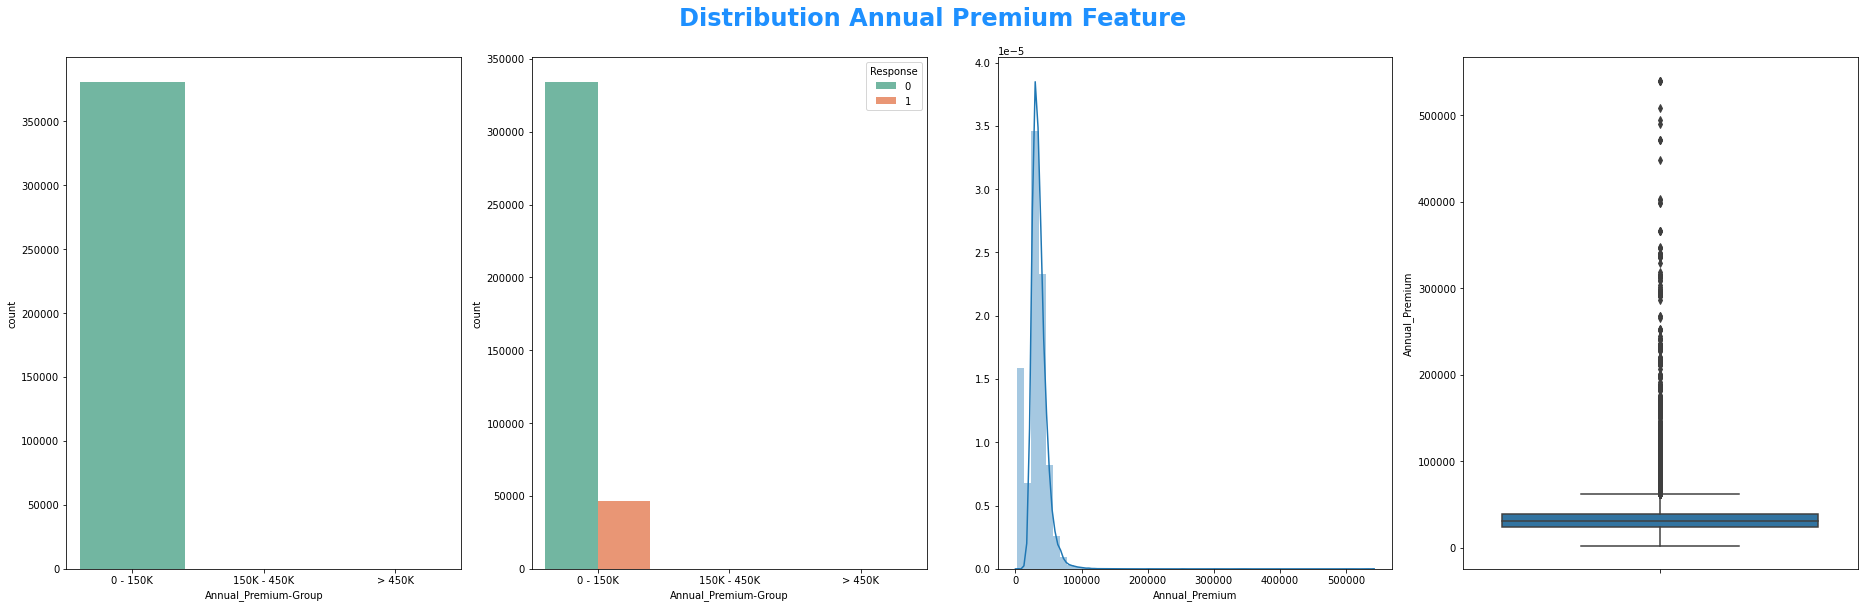

In [59]:
fig,ax = plt.subplots(1,4,figsize=(26,8))

g = sns.countplot(trainGroup['Annual_Premium-Group'],palette=sns.color_palette("Set2"), ax=ax[0])
g = sns.countplot(trainGroup['Annual_Premium-Group'], hue = trainGroup['Response'],palette=sns.color_palette("Set2"), ax=ax[1])
g = sns.distplot(train['Annual_Premium'], ax=ax[2])
g = sns.boxplot(train['Annual_Premium'], orient='v', ax=ax[3])

plt.suptitle('Distribution Annual Premium Feature',y=1.05, fontsize=24,color='dodgerblue',fontweight='bold');
	
fig.tight_layout();

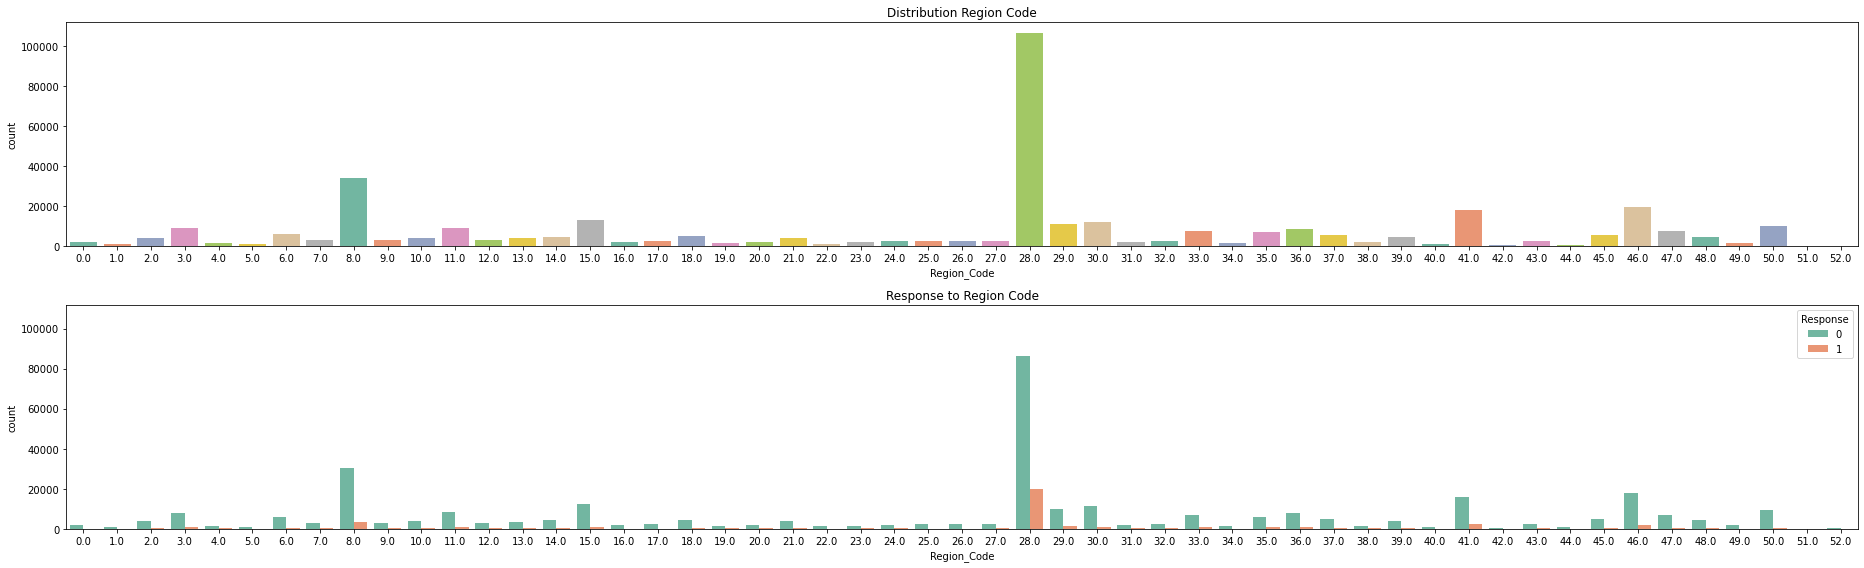

In [61]:
fig,ax = plt.subplots(2,figsize=(26,8),
                     sharey=True)

sns.countplot(train['Region_Code'],palette=sns.color_palette("Set2"), ax=ax[0])
ax[0].set_title('Distribution Region Code')

sns.countplot(train['Region_Code'],hue= train['Response'],palette=sns.color_palette("Set2"), ax=ax[1])
ax[1].set_title('Response to Region Code')

fig.tight_layout();

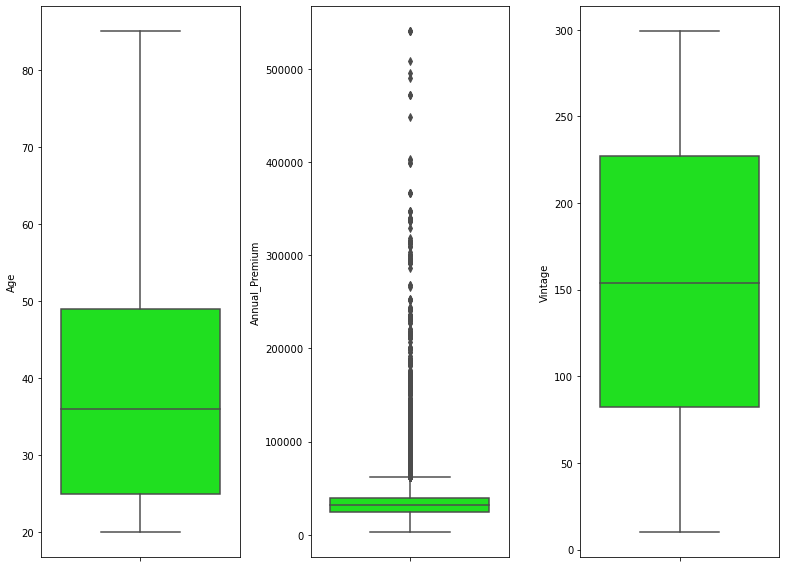

In [115]:
features = ['Age', 'Annual_Premium', 'Vintage']
plt.figure(figsize=(26, 8))

for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(train[features[i]],color='lime',orient='v')
    plt.tight_layout()

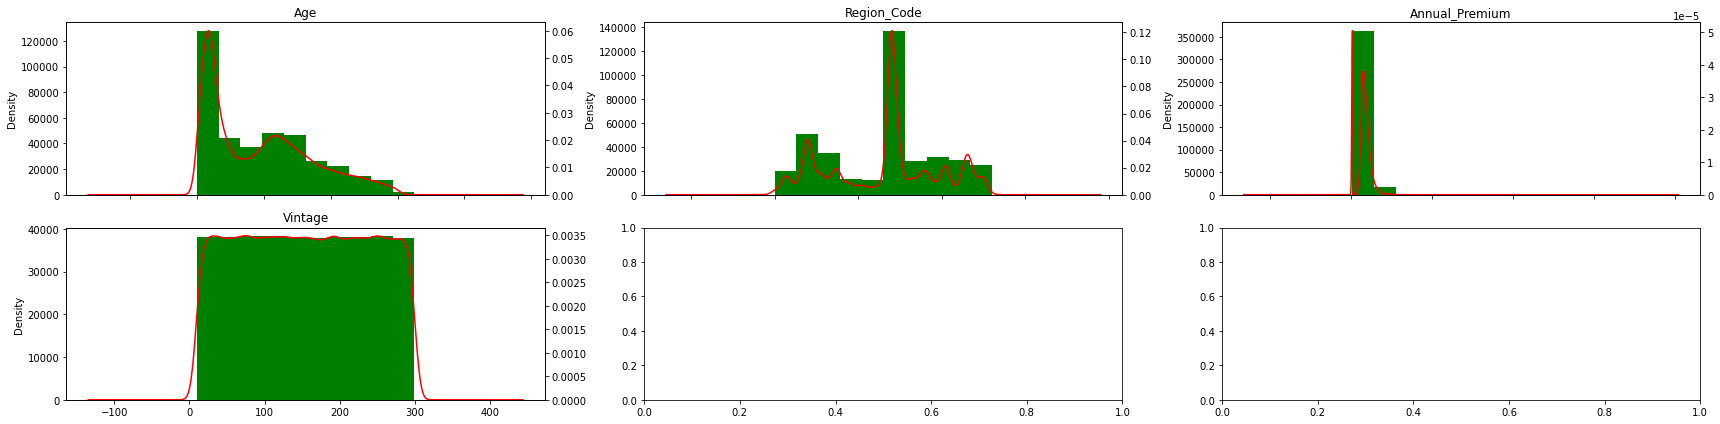

In [87]:
data_num = train[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 8, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()
# plt.savefig('fig/numerical distplot.png')

<h2>FEATURE ENGINEERING</h2>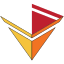

In [63]:
train_dummies = pd.get_dummies(train[['Gender', 'Vehicle_Damage', 'Vehicle_Age']])
train_dummies.columns = ['Gender_Female', 'Gender_Male', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes', 'Vehicle_Age_1-2_Year', 'Vehicle_Age_<1_Year','Vehicle_Age_>2_Year']
train = pd.concat([train, train_dummies], axis=1)
train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  Gender_Female  Gender_Male  Vehicle_Damage_No  \
0         1              0            1                  0   
1         0              0            1                  1   
2         1              0            1                  0   
3         0              0            1                  1   
4         0              1            0                  1   

   Vehicle_Damage_Yes  Vehicle_Age_1-2_Year  Vehicle_Age_<1_Year  \
0                   1                     0                    0   
1                   0                     1                    0   
2                   1                     0                    0   
3                   0                     0                    1   
4                   0                     0                    1   

   Vehicle_Age_>2_Year  
0                    1  
1                    0  
2                    1  
3                    0  
4                    0

In [64]:
train = train.drop(['id', 'Gender', 'Vehicle_Age', 'Vehicle_Damage'], axis=1)
train.head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   44                1         28.0                   0         40454.0   
1   76                1          3.0                   0         33536.0   
2   47                1         28.0                   0         38294.0   
3   21                1         11.0                   1         28619.0   
4   29                1         41.0                   1         27496.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Female  Gender_Male  \
0                  26.0      217         1              0            1   
1                  26.0      183         0              0            1   
2                  26.0       27         1              0            1   
3                 152.0      203         0              0            1   
4                 152.0       39         0              1            0   

   Vehicle_Damage_No  Vehicle_Damage_Yes  Vehicle_Age_1-2_Year  \
0                  0                   1                     0   
1                  1                   0                     1   
2                  0                   1                     0   
3                  1                   0                     0   
4                  1                   0                     0   

   Vehicle_Age_<1_Year  Vehicle_Age_>2_Year  
0                    0                    1  
1                    0                    0  
2                    0                    1  
3                    1                    0  
4                    1                    0

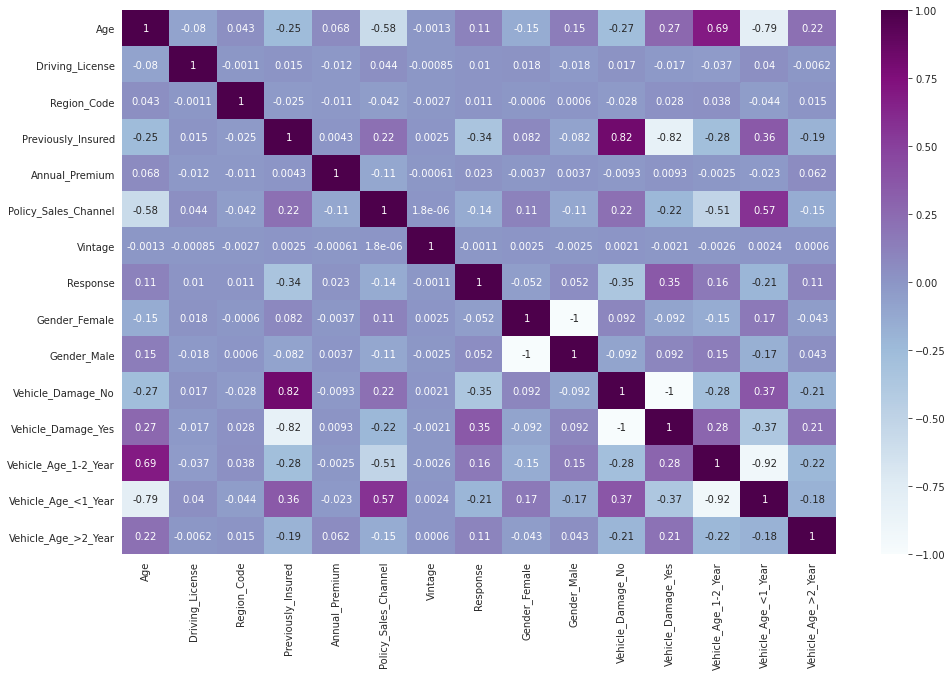

In [65]:
corr_= train.corr()
mask = np.zeros_like(corr_)
    
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr_, annot=True, cmap = "BuPu")

plt.tight_layout;
# plt.savefig('fig/matrix correlation.png');

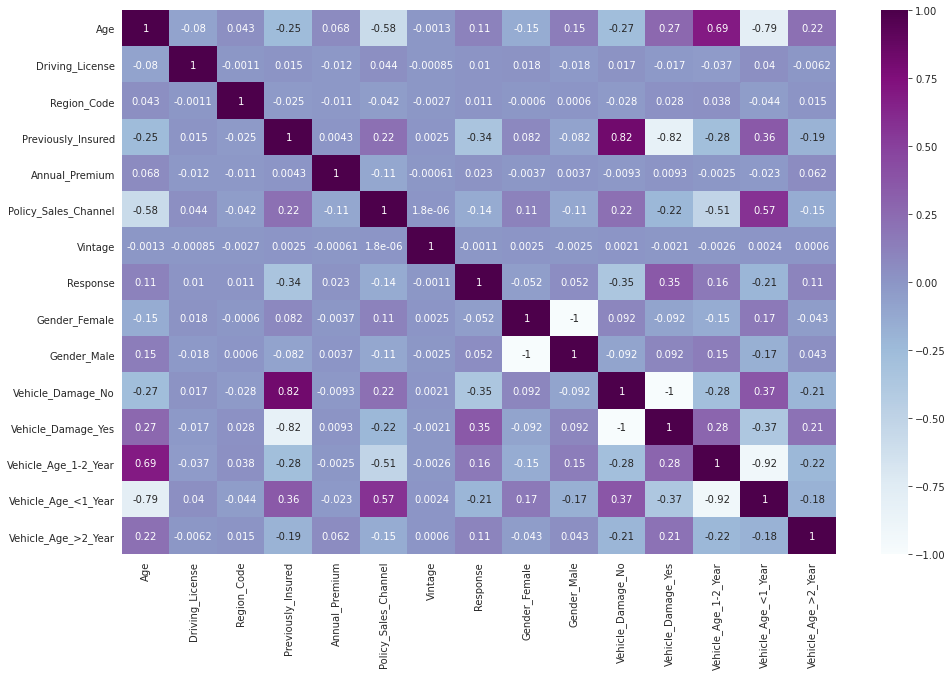

In [78]:
corr_= train.corr()
mask = np.zeros_like(corr_)
    
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr_, annot=True, cmap = "BuPu")

plt.tight_layout;
# plt.savefig('fig/matrix correlation.png');

In [79]:
trains

Age  Driving_License  Region_Code  Annual_Premium  \
0        44                1         28.0         40454.0   
1        76                1          3.0         33536.0   
2        47                1         28.0         38294.0   
3        21                1         11.0         28619.0   
4        29                1         41.0         27496.0   
...     ...              ...          ...             ...   
381104   74                1         26.0         30170.0   
381105   30                1         37.0         40016.0   
381106   21                1         30.0         35118.0   
381107   68                1         14.0         44617.0   
381108   46                1         29.0         41777.0   

        Policy_Sales_Channel  Vintage  Response  Gender_Male  \
0                       26.0      217         1            1   
1                       26.0      183         0            1   
2                       26.0       27         1            1   
3                      152.0      203         0            1   
4                      152.0       39         0            0   
...                      ...      ...       ...          ...   
381104                  26.0       88         0            1   
381105                 152.0      131         0            1   
381106                 160.0      161         0            1   
381107                 124.0       74         0            0   
381108                  26.0      237         0            1   

        Vehicle_Damage_Yes  Vehicle_Age_1-2_Year  Vehicle_Age_>2_Year  
0                        1                     0                    1  
1                        0                     1                    0  
2                        1                     0                    1  
3                        0                     0                    0  
4                        0                     0                    0  
...                    ...                   ...                  ...  
381104                   0                     1                    0  
381105                   0                     0                    0  
381106                   0                     0                    0  
381107                   1                     0                    1  
381108                   0                     1                    0  

[367630 rows x 11 columns]

<h2>PRE-PROCESSING</h2>

In [69]:
# train.shape
# annualPrem = trains['Annual_Premium']
# maxValue = annualPrem.quantile(0.75) + (1.3 * (annualPrem.quantile(0.75) - annualPrem.quantile(0.25)))
# trains = trains.drop(trains[trains['Annual_Premium'] > maxValue].index)

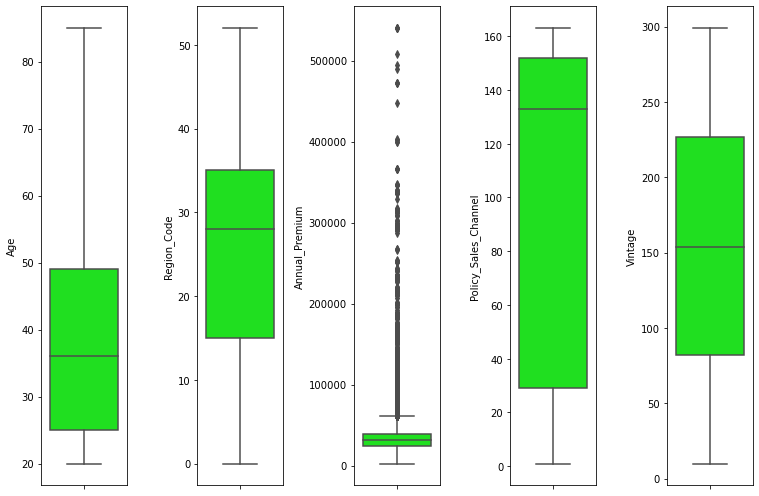

In [75]:
# features = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
# plt.figure(figsize=(15, 7))
# for i in range(0, len(features)):
#     plt.subplot(1, 7, i+1)
#     sns.boxplot(train[features[i]],color='lime',orient='v')
#     plt.tight_layout()
    
# plt.savefig('fig/numerical boxplot.png')

In [72]:
# data_num = trains[features]
# k = len(data_num.columns)
# n = 3
# m = (k - 1) // n + 1
# fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
# for i, (name, col) in enumerate(data_num.iteritems()):
#     r, c = i // n, i % n
#     ax = axes[r, c]
#     col.hist(ax=ax, color='green')
#     ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
#     ax2.set_ylim(0)

# fig.tight_layout()
# plt.savefig('fig/numerical distplot.png')